# OBJECTIVE:
## To build and train a neural network to classify images of fashion clothing, like sneakers and shirts.
### Importing the Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
import random
from keras.datasets import fashion_mnist

Using TensorFlow backend.


### Loading the dataset

Fashion MNIST dataset, which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at a resolution of 28×28 pixels.
60000 images for training and rest 10000 for testing

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

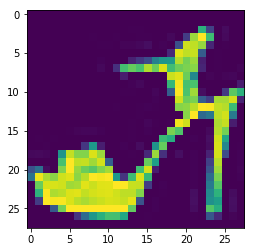

In [0]:
plt.imshow(x_train[9])

In [0]:
x_train[9].shape

(28, 28)

Each imageis of shape (28,28), with pixel values in the range [0, 255]. The labels are an array of integers, in the range [0, 9]. These correspond to the class of clothing the image represents:

In [0]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot']

## Preprocess the data
### Data Normalisation
The value of each pixel in the image data is an integer in the range `[0,255]`. For the model to work properly, these values need to be normalized to the range `[0,1]`. So here divide each pixel intensity by 255 to get the pixel in range `[0,1]`.

In [0]:
x_train = x_train.astype('float')
x_train /= 255
x_test = x_test.astype('float')
x_test /= 255


### Flattening
Converting each image from 2D matrix of shape(28,28) into a tow vector of (1,784)

In [0]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)


## One Hot Encoding
*One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.*

Since our target variable(y_train and y_test) are categorical variables, so we will one hot encode the them.

In [0]:
one_hot_vectors=np.eye(len(np.unique(y_train)))

for i in range(len(one_hot_vectors)):
  print(i," is represented as :  " ,one_hot_vectors[i] )

0  is represented as :   [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1  is represented as :   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2  is represented as :   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3  is represented as :   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4  is represented as :   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5  is represented as :   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6  is represented as :   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7  is represented as :   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8  is represented as :   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9  is represented as :   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
y_train_encoded=one_hot_vectors[y_train]
y_test_encoded=one_hot_vectors[y_test]


## Explore the processed data

### Let's plot an image to see what it looks like.

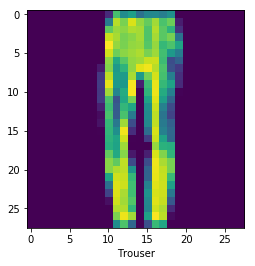

In [0]:
# Take a single image, 
index=np.random.randint(0,len(x_train))
image = x_train[index].reshape(28,28)
label=class_names[y_train[index]]
# Plot the image 
plt.xlabel(label)
plt.imshow(image)
plt.show()

### Display the random 25 images from the training set and display the label name below each image. 

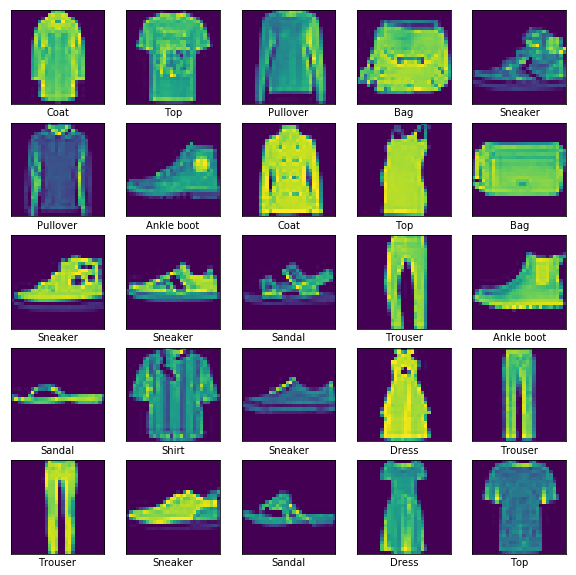

In [0]:
plt.figure(figsize=(10,10))
i = 0
for each in range(25):
  index=np.random.randint(0,len(x_train))
  
  image = x_train[index].reshape(28,28)
  label=class_names[y_train[index]]
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)
  plt.xlabel(label)
  i += 1
plt.show()

## Build the model
## ***With Tensorflow***

TensorFlow is a open source Python library for fast numerical computing created and released by by the Google Brain team.
It is a foundation library that can be used to create Deep Learning models directly or by using wrapper libraries that simplify the process built on top of TensorFlow.

## ***Tensor***
It is just a multi-dimensional array

## Tensorflow works on "LAZY EVALUATION"
This means that first we have to set up the entire pipeline before feeding the data. 
Decide the architecture. 
Number of neuron in the Input and Output Layer.
Number of hidden layers and how many neurons in each of them.
Initialise the weights and set the activation function in each layer, cost function, optimisation algorithm and all necessary details of the neural network.
After designing the architecture, we then will train our neural network model by feeding the data in correct format and then use that model to do the required task.






In [0]:
import tensorflow as tf

In tensorflow NN, we have 3 rooms:


1.  For Variables
2.  For Placeholders
3.  For training
## **1.Variables:** 
The values of **Weights and bias** in the NN are varies in the training process(gradient descent) to get those perfect values for which loss is minimum. So these are placed in the **Tensorflow Variables**.

Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running operations on it.Internally, a tf.Variable stores a persistent tensor. Specific operations allow you to read and modify the values of this tensor. These modifications are visible across multiple tf.Sessions, so multiple workers can see the same values for a tf.Variable.

## 2. Placeholder:
The **data** that is feeded into the neural network remains intact during entire training. So they are called as Constants or **Placeholders**(in tensorflow)

Placeholders are used to feed external data into a TensorFlow graph. It allows a value to be assigned later i.e. a place in the memory where we'll store a value later on. To define a Placeholder we use tf.placeholder() command.

## *Before everything, we have to tell what will be our variables and placeholders, what will be their shapes and all.*

## Creating Placeholders
we are putting **None** as the number of rows so that later we can use any batch size for the gradient descent

In [0]:
num_of_features=784

x_PH=tf.placeholder(dtype=tf.float64,shape=[None,num_of_features])

y_PH=tf.placeholder(dtype=tf.float64,shape=[None,10])

## Creating Variables

We have 

*   **one input layer with 784 neurons**
*   **one hidden layer with 512 neurons**
*   **second hidden layer with 256 neurons**
*   **third hidden layer with 32 neurons**
*   **one output layer with 10 neurons**


In [0]:
# Making Tensorflow Variables for Slopes(Weights) & intercepts(Bias)

input_neuron_num=784
hidden1_neuron_num=512
hidden2_neuron_num=256
hidden3_neuron_num=32
#hidden4_neuron_num=784
output_neuron_num=10

# FOR Weights and Bias Between Input Layer and first Hidden layer
weight_IH1 = np.random.randn(input_neuron_num,hidden1_neuron_num)
weight_IH1 = tf.Variable(weight_IH1)
bias_IH1 = random.random()
bias_IH1 = tf.cast(bias_IH1, tf.float64) # Since C values are float32 , and tensors accept only float 64, we're converting all c values to float64
bias_IH1 = tf.Variable(bias_IH1)


# FOR Weights and Bias Between first Hidden layer and second hidden Layer 
weight_H1H2 = np.random.randn(hidden1_neuron_num,hidden2_neuron_num)
weight_H1H2 = tf.Variable(weight_H1H2)
bias_H1H2 = random.random()
bias_H1H2 = tf.cast(bias_H1H2, tf.float64) 
bias_H1H2 = tf.Variable(bias_H1H2)

# FOR Weights and Bias Between second Hidden layer and third hidden Layer 
weight_H2H3 = np.random.randn(hidden2_neuron_num,hidden3_neuron_num)
weight_H2H3 = tf.Variable(weight_H2H3)
bias_H2H3 = random.random()
bias_H2H3 = tf.cast(bias_H2H3, tf.float64) 
bias_H2H3 = tf.Variable(bias_H2H3)


# FOR Weights and Bias Between third Hidden layer and final output Layer 
weight_H3O = np.random.randn(hidden3_neuron_num,output_neuron_num)
weight_H3O = tf.Variable(weight_H3O)
bias_H3O = random.random()
bias_H3O = tf.cast(bias_H3O, tf.float64) 
bias_H3O = tf.Variable(bias_H3O)

## Defining the layers

In [0]:
L1Out = tf.matmul(x_PH, weight_IH1)+bias_IH1    # Liout = x_PH * weight_IH1 + bias_IH1 
L1Out= tf.nn.relu(L1Out)                        # applying Relu Activation Fucntion

L2Out = tf.matmul(L1Out, weight_H1H2)+bias_H1H2 # L2out= L1Out * weight_H1H2 + bias_H1H2
L2Out= tf.nn.relu(L2Out)                        # applying Relu Activation Fucntion


L3Out = tf.matmul(L2Out, weight_H2H3)+bias_H2H3 
L3Out= tf.nn.relu(L3Out)   

'''
L4Out = tf.matmul(L3Out, weight_H3H4)+bias_H3H4 
L4Out= tf.nn.relu(L4Out)   
'''

L4Out = tf.matmul(L3Out, weight_H3O)+bias_H3O   # L4out= L3Out * weight_H3O + bias_H3O
y_output=tf.nn.softmax(L4Out)                   # applying Softmax Activation Fucntion

## Defining the cost function (Mean Squared Error) and selecting the optimisation algorithm

In [0]:
cost = tf.reduce_mean(0.5*(y_output - y_PH)**2)

optimizer = tf.train.AdamOptimizer()   #Setting up Adam optimizer

In [0]:
minimizer = optimizer.minimize(cost)  # Minimising cost by setting up cost inside optimizer

## This code will initialise all global variables

 tf.global_variables_initializer()  returns global variables. Global variables are variables that are shared across machines in a distributed environment

In [0]:
initialisation = tf.global_variables_initializer()

## tf.Session is a class for running TensorFlow operations.
A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated


In [0]:

session = tf.Session()


In [0]:
session.run(initialisation)

 
 ## feed_dict is a dictionary used to feed values to TensorFlow placeholders 

In [0]:

training_feedDict = {x_PH : np.array(x_train),y_PH : np.array(y_train_encoded)}   
testing_feedDict = {x_PH : np.array(x_test),y_PH : np.array(y_test_encoded)}

## Defining method to calculate accuracy

In [0]:
def accuracy(prediction,y):   
  prediction=np.argmax(prediction,axis=1)
  y=np.argmax(y,axis=1)
  return (len(y[prediction==y])/len(y))*100

## This is the code where actual training of NN is taking  place

**************RESULTS****************
Error                      :  0.06 %
accuracy on training data  : 44.88 %
accuracy on testing data   : 44.05 %


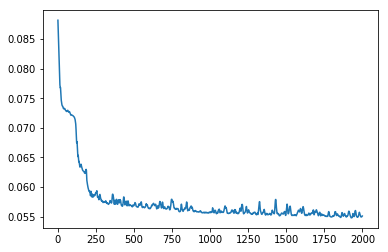

In [0]:
#  trweaining NN

epochs = 2000
error = []
for epoch in range(epochs):  
  session.run(minimizer, feed_dict = training_feedDict)
  error.append(session.run(cost,feed_dict = training_feedDict))

  clear_output(True)
  print("Epoch  : ",epoch,"      error :",session.run(cost,feed_dict = training_feedDict))
  print("accuracy on training data : ",accuracy(session.run(y_output,feed_dict = training_feedDict),y_train_encoded))
  print("accuracy on testing data  : ",accuracy(session.run(y_output,feed_dict = testing_feedDict),y_test_encoded))
clear_output(True)
plt.plot(error)
print("**************RESULTS****************")
print("Error                      :  {0:.2f} %".format(session.run(cost,feed_dict = training_feedDict)))
print("accuracy on training data  : {0:.2f} %".format(accuracy(session.run(y_output,feed_dict = training_feedDict),y_train_encoded)))
print("accuracy on testing data   : {0:.2f} %".format(accuracy(session.run(y_output,feed_dict = testing_feedDict),y_test_encoded)))